# Exercise I

**For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.**

### - *revisit wording to improve and get comfortable.

- **Has the network latency gone up since we switched internet service providers?**

**NULL HYPOTHESIS (H0):** There is no difference in network latency since we switched ISPs.

**ALTERNATE HYPOTHESIS (Ha):** There is a difference in network latency since we switched ISPs.

**TRUE (+):** After switching ISPs, the network latency has gone up and the test detects this change.

**TRUE (-):** After switching ISPs, the network latency did not change. the test shows no increase or changes.

**TYPE I ERROR:** The test poorly identifies any increase in network latency when there is no change

**TYPE II ERROR:** The tests failed to identify an increase in nework latency, even after it shows it has gone up.

- **Is the website redesign any good?**

**NULL HYPOTHESIS (H0):** The web redesign is not as good and has not had any impact on metrics.

**ALTERNATE HYPOTHESIS (Ha):** The web redesign is good and has driven user count and engagement.

**TRUE (+):** The redesign of the website shows promising results for metrics, and the test reflects those outcomes.

**TRUE (-):** The redesign of the website is not driving any change in website metrics, and the test shows there was no impact from the redesign.

**TYPE I ERROR:** The test shows false when indicating an improvement in website metrics, but there is no change

**TYPE II ERROR:** The test failed ot detect an improvement in website metrics, even as the redesign has made an improvement.

- **Is our television ad driving more sales?**

**NULL HYPOTHESIS (H0):** The television advertisement has failed to drive sales and has not driven sales.

**ALTERNATE HYPOTHESIS (Ha):** The television advertisement has made changes, and has driven sales.

**TRUE (+):** The TV advertisement has made impact on sales and the test is correctly displays those results.

**TRUE (-):** The TV advertisement has not made an impact on sales and the test reflects those negative results.

**TYPE I ERROR:** The test shows TV ad sales conditions are respresented as false, but we can see that there is no change.

**TYPE II ERROR:** The test faield to display increase in sales from the TV ad, even though there is an up-tick in sales.

# **------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### continued...

# Exercise II

Continue working in your hypothesis_testing notebook.

In [1]:
import numpy as np
import pandas as pd

from pydataset import data
from scipy import stats
from scipy.stats import chi2_contingency

1. **Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.**

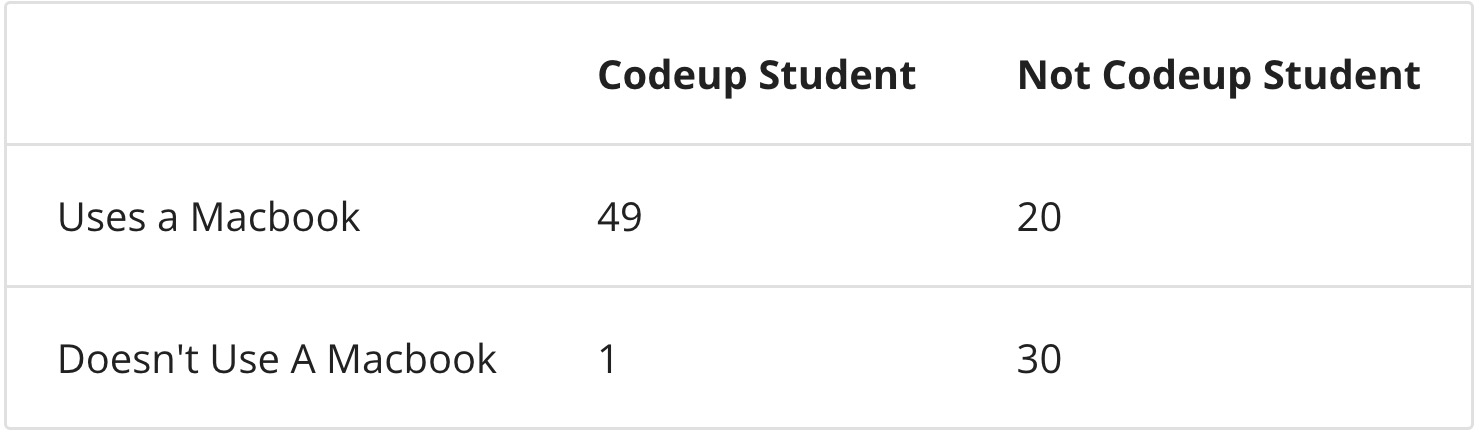

**NULL HYPOTHESIS (H0):** A Macbook user is independent from being a codeup student

**ALTERNATIVE HYPOTHESIS (Ha):** A Macbook user is dependent on being a codeup student

In [2]:
# made the table to use the data
data = {
    'Codeup Student': [49, 1],
    'Not Codeup Student': [20, 30]
}
contingency_table = pd.DataFrame(data, index=['Uses a Macbook', "Doesn't Use A Macbook"])

In [3]:
#implemened the chi squared contingency test
chi, p, degf, exp = stats.chi2_contingency(contingency_table)

In [4]:
chi

36.65264142122487

In [5]:
p

1.4116760526193828e-09

In [6]:
degf

1

In [7]:
exp

array([[34.5, 34.5],
       [15.5, 15.5]])

In [8]:
contingency_table

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [9]:
a = 0.05

In [10]:
if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else: print('We failed to reject the null hypothesis.')

We reject the null hypothesis. There appears to be a relationship.


### **After testing the contingency table i came to the conclusion that there is a correlation between those features in the dataset**

2. **Choose another 2 categorical variables from the mpg dataset.**

2. **Choose another 2 categorical variables from the mpg dataset.**

#### **Categorical variables:**

- cyl | trans

In [11]:
import numpy as np
import pandas as pd

from pydataset import data
from scipy import stats
from scipy.stats import chi2_contingency

#imported data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- State your null and alternative hypotheses.

**NULL HYPOTHESIS (H0):** cylinders are independent from transmission type

**ALTERNATIVE HYPOTHESIS (Ha):** cylinders are dependent on transmission type

- State your alpha.

In [12]:
#stated alpha
a = 0.05

- Perform a chi2 test of indepedence.

In [13]:
observed = pd.crosstab(mpg.drv, mpg.cyl)
observed

cyl,4,5,6,8
drv,,,,
4,23,0,32,48
f,58,4,43,1
r,0,0,4,21


In [14]:
#implemened the chi squared contingency test
chi, p, degf, exp = stats.chi2_contingency(observed)

In [15]:
chi

98.13550541481473

In [16]:
p

6.143348809350951e-19

In [17]:
degf

6

In [18]:
exp

array([[35.65384615,  1.76068376, 34.77350427, 30.81196581],
       [36.69230769,  1.81196581, 35.78632479, 31.70940171],
       [ 8.65384615,  0.42735043,  8.44017094,  7.47863248]])

- State your conclusion

In [19]:
if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else: print('We failed to reject the null hypothesis.')

We reject the null hypothesis. There appears to be a relationship.


  
3. **Use the data from the employees database to answer these questions:**

In [20]:
# DS Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data
from env import get_connection
from sqlalchemy import create_engine, text

In [21]:
def get_db_url(database):
    return get_connection(database)

In [22]:
url = get_db_url('employees')
query = text('SELECT * FROM employees')
engine = create_engine(url)
employees = pd.read_sql(query, engine.connect())

In [23]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)


In [27]:
url = get_db_url('employees')
query = '''
        SELECT *
        FROM dept_emp 
        LEFT JOIN employees ON dept_emp.emp_no = employees.emp_no 
        LEFT JOIN departments ON dept_emp.dept_no = dept_emp.dept_no
        WHERE  CURDATE() > to_date
        '''
engine = create_engine(url)
employees = pd.read_sql(query, engine.connect())

In [28]:
employees.head()

,emp_no,dept_no,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_no,dept_name
0,10008,d005,1998-03-11,2000-07-31,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,d007,Sales
1,10008,d005,1998-03-11,2000-07-31,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,d008,Research
2,10008,d005,1998-03-11,2000-07-31,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,d006,Quality Management
3,10008,d005,1998-03-11,2000-07-31,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,d004,Production
4,10008,d005,1998-03-11,2000-07-31,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,d001,Marketing


In [33]:
employees = employees.drop(['emp_no', 'dept_no', 'birth_date', 'hire_date', 'from_date', 'to_date', 'first_name', 'last_name'], axis=1)

In [34]:
employees['emp_dept'] = np.where(employees.dept_name.str.startswith('S'), 'Sales', 'Marketing')
employees.head()

,gender,dept_name,emp_dept
0,M,Sales,Sales
1,M,Research,Marketing
2,M,Quality Management,Marketing
3,M,Production,Marketing
4,M,Marketing,Marketing


In [35]:
employees = employees.drop(['dept_name'], axis=1)

In [36]:
employees.head()

,gender,emp_dept
0,M,Sales
1,M,Marketing
2,M,Marketing
3,M,Marketing
4,M,Marketing


In [38]:
gender_dept_correlation = pd.crosstab(employees.gender, employees.emp_dept)
gender_dept_correlation 

emp_dept,Marketing,Sales
gender,,
F,293944,36743
M,437888,54736


In [39]:
#implemened the chi squared contingency test
chi, p, degf, exp = stats.chi2_contingency(gender_dept_correlation)

In [40]:
chi

0.0

In [41]:
p

1.0

In [42]:
degf

1

In [43]:
exp

array([[293944.,  36743.],
       [437888.,  54736.]])

In [ ]:
#set alpha
a = 0.05

In [44]:
if p < a:
    print('We reject the null hypothesis. There appears to be a relationship.')
else: print('We failed to reject the null hypothesis.')

We failed to reject the null hypothesis.


- Is an employee's gender independent of whether or not they are or have been a manager?